# **Préparation des données**

In [91]:
# Importation des bibliotheques Python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [92]:
# Importation des données
df_train = pd.read_csv("./Data/train.csv")
df_test = pd.read_csv("./Data/test.csv")

In [93]:
# Visualisation des données
df_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [94]:
df_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [95]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

<AxesSubplot:ylabel='None'>

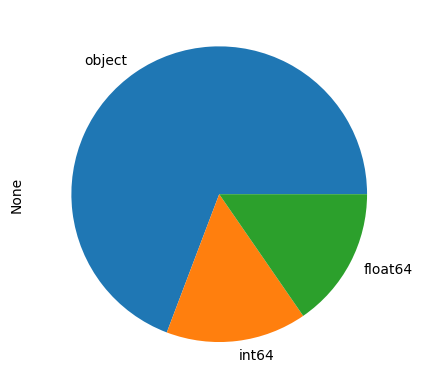

In [96]:
df_train.dtypes.value_counts().plot.pie()

In [97]:
# Affichage du nombre de NaN par colonnes
pd.isnull(df_train).sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

On peut voir sur le tableau ci-dessus que la/les colonne(s): New_Price contient 5195 valeurs null, Engine et Power contiennent 36 valeurs null,  Seats 42 valeurs null, et Mileage 2 valeurs null.
Etant données la quantité de données null dans New_Price, il me semble judicieux de supprimer la colonne du dataset df_train avant de modifier ou supprimer les valeurs null des autre colonnes.

In [98]:
# Modification du dataset
df_train = df_train.drop(columns=['New_Price'])
df_train = df_train.dropna()
df_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [99]:
# Vérification de l'abscence de NaN après modification du dataset
pd.isnull(df_train).sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<AxesSubplot:>

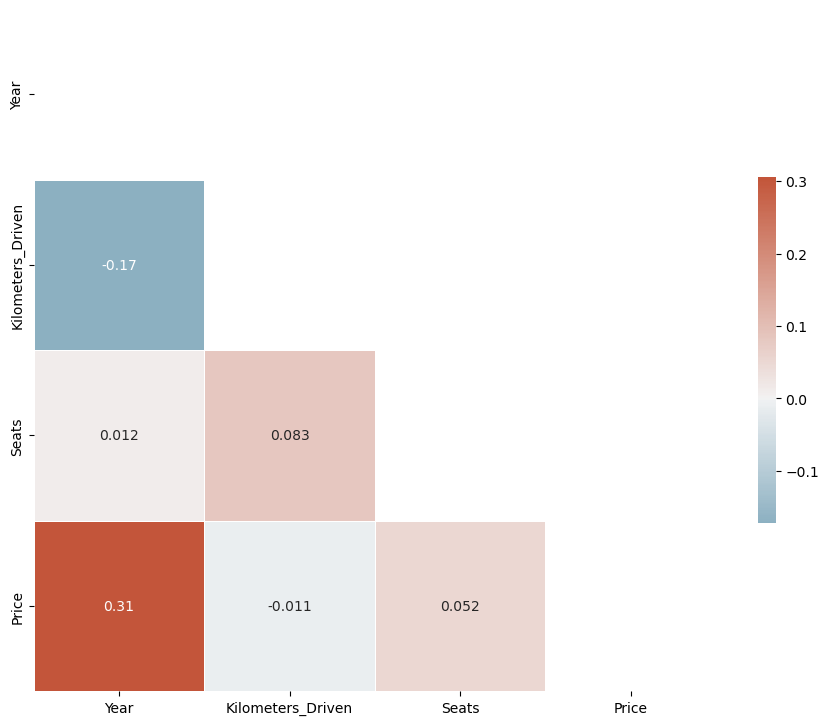

In [100]:
# Affichage de la 1ère matrice de collération
corr = df_train.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,  center=0, square=True, linewidths=.5,cbar_kws={"shrink": .5},  annot=True)

La matrice de corrélation ci-dessus n'utilise que les colonnes de notre dataset qui contiennent des valeurs numériques (4/12 après le retrait de la colonne New_Price). Cela signifie que ses résultats ne sont pas représentatif de notre dataset et que nous allons devoir transformer certaines ou toutes les colonnes de type objet pour améliorer notre matrice.

In [101]:
# Analyse des colonnes de type object
df_train.Name.value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1855, dtype: int64

In [102]:
df_train.Location.value_counts()

Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64

In [103]:
df_train.Fuel_Type.value_counts()

Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

In [104]:
df_train.Transmission.value_counts()

Manual       4266
Automatic    1709
Name: Transmission, dtype: int64

In [105]:
df_train.Owner_Type.value_counts()

First             4903
Second             953
Third              111
Fourth & Above       8
Name: Owner_Type, dtype: int64

In [106]:
df_train.Engine.value_counts()

1197 CC    606
1248 CC    512
1498 CC    303
998 CC     259
2179 CC    240
          ... 
1489 CC      1
1422 CC      1
1978 CC      1
2694 CC      1
1797 CC      1
Name: Engine, Length: 145, dtype: int64

In [107]:
df_train.Power.value_counts()

74 bhp        235
98.6 bhp      131
73.9 bhp      125
140 bhp       123
78.9 bhp      111
             ... 
201 bhp         1
199.3 bhp       1
95 bhp          1
152.88 bhp      1
181.04 bhp      1
Name: Power, Length: 371, dtype: int64

In [108]:
# Modification des colonnes de type object en colonnes de type float ou int
location_code = {
    'Mumbai': 1,
    'Hyderabad': 2,
    'Kochi': 3,
    'Coimbatore': 4,
    'Pune': 5,
    'Dehli': 6,
    'Kolkata': 7,
    'Chennai': 8,
    'Jaipur': 9,
    'Bangalore': 10,
    'Ahmedabad': 11,
}

fuel_code = {
    'Diesel': 1,
    'Petrol': 2,
    'CNG': 3,
    'PLG': 4,
}

transmission_code = {
    'Manual': 1,
    'Automatic': 2,
}

owner_code = {
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth & Above': 4,
}

df_train['Location'] = df_train['Location'].map(location_code)
df_train['Fuel_Type'] = df_train['Fuel_Type'].map(fuel_code)
df_train['Transmission'] = df_train['Transmission'].map(transmission_code)
df_train['Owner_Type'] = df_train['Owner_Type'].map(owner_code)
df_train.dropna()
df_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,1.0,2010,72000,3.0,1,1,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,5.0,2015,41000,1.0,1,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,8.0,2011,46000,2.0,1,1,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,8.0,2012,87000,1.0,1,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,4.0,2013,40670,1.0,2,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,NaN,2014,27365,1.0,1,1,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,9.0,2015,100000,1.0,1,1,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,9.0,2012,55000,1.0,1,2,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,7.0,2013,46000,2.0,1,1,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


<AxesSubplot:>

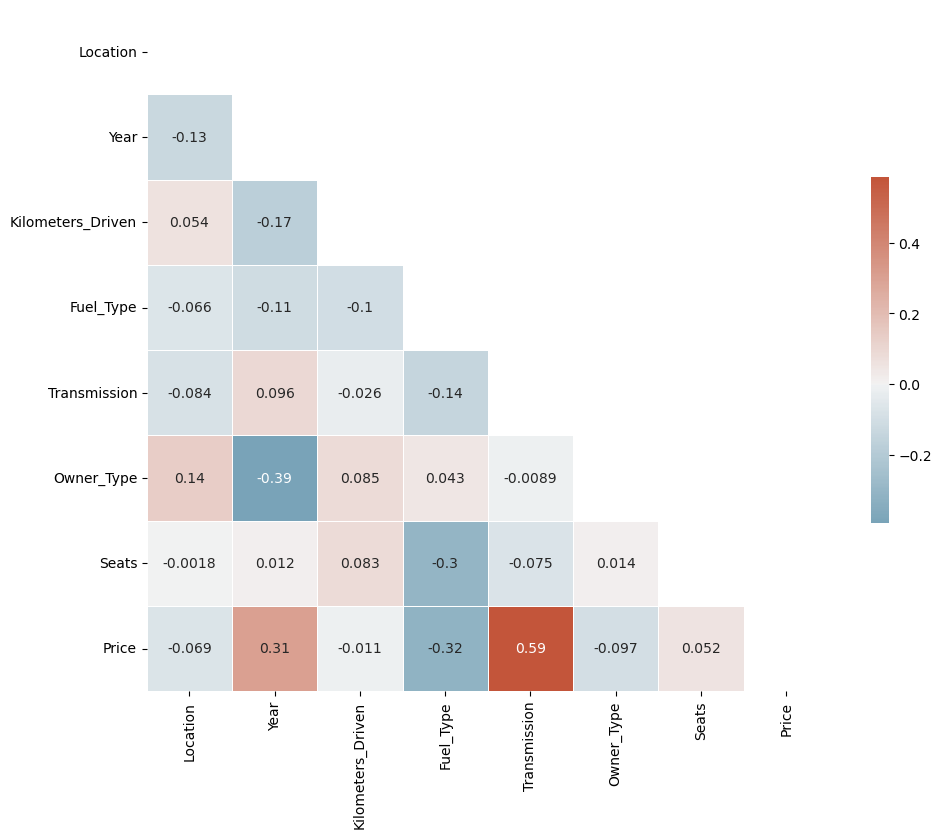

In [109]:
# Affichage d'une 2ème matrice de collération
corr = df_train.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,  center=0, square=True, linewidths=.5,cbar_kws={"shrink": .5},  annot=True)

Cette matrice de corrélation est meilleur que la première matrice généré

In [110]:
# Suppression des unités de mesures dans les colonnes Engine & Power
df_train['Engine'] = df_train['Engine'].str.replace(' CC', '')
df_train['Power'] = df_train['Power'].str.replace(' bhp', '')

# Conversion en float des données des colonnes Engine & Power
df_train['Engine'] = pd.to_numeric(df_train['Engine'], errors='coerce')
df_train['Power'] = pd.to_numeric(df_train['Power'], errors='coerce')

# Changement du nom des colonnes Engine & Power pour inclure les unités de mesures correspondantes
df_train = df_train.rename(columns={'Engine': 'Engine (in CC)', 'Power': 'Power (in bhp)'})

<AxesSubplot:>

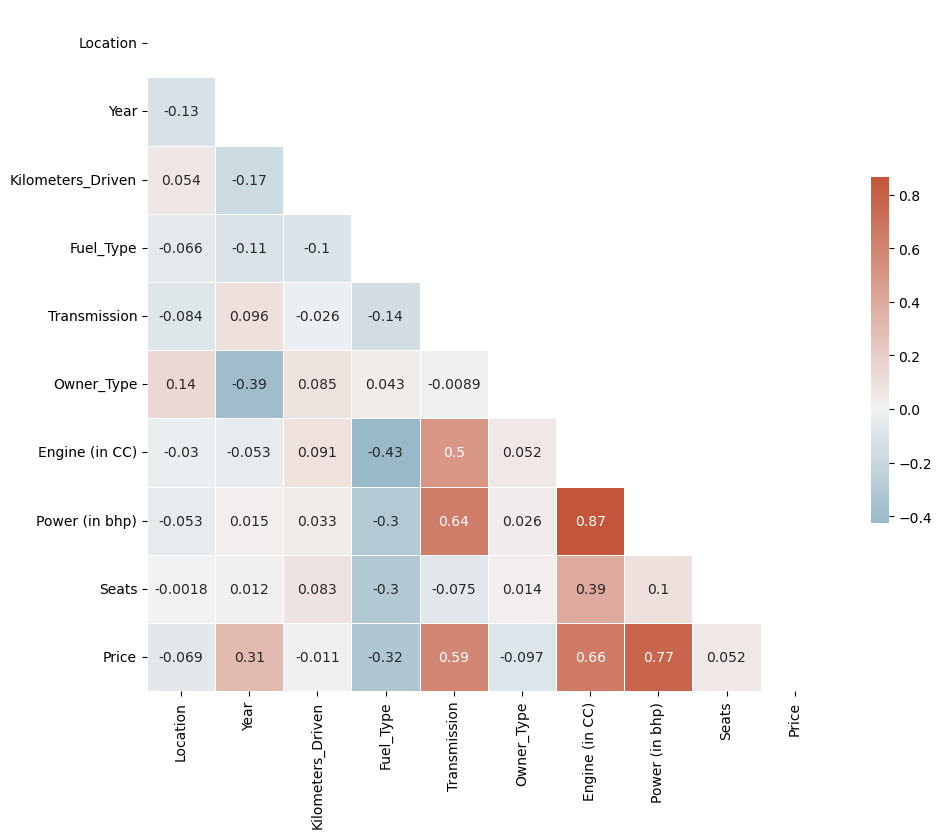

In [111]:
# Affichage d'une 3ème matrice de collération
corr = df_train.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,  center=0, square=True, linewidths=.5,cbar_kws={"shrink": .5},  annot=True)

Avec cette troisième matrice de corrélation, on constate que le prix d'une voiture est fortement corrélé avec l'année de production, la transmission, le moteur, et la puissance moteur de celle-ci donc on peut dire que ces quatre features sont les plus importantes.
De plus le moteur et la puissance moteur sont fortement corrélé entre eux donc il serait sage de ne retenir qu'une seule de ces deux features pour l'entrainement du modèle et donc on va retenir Power car sa corrélation avec Price est plus grande que Engine.

In [112]:
# Affichage du nombre de ligne en km/kg et kmpl
kmkg = 0
kmpl = 0
for i in df_train.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('Nombre de lignes avec Km/Kg : {} '.format(kmkg))
print('Nombre de lignes avec kmpl : {} '.format(kmpl))

Nombre de lignes avec Km/Kg : 66 
Nombre de lignes avec kmpl : 5909 


In [113]:
# Conversion des mileage en km/kg en mileage en kmpl
Correct_Mileage= []
for i in df_train.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))
        
df_train['Mileage']=Correct_Mileage
df_train = df_train.rename(columns={'Mileage':'Mileage in kmpl'})
df_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage in kmpl,Engine (in CC),Power (in bhp),Seats,Price
0,Maruti Wagon R LXI CNG,1.0,2010,72000,3.0,1,1,37.24,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,5.0,2015,41000,1.0,1,1,19.60,1582,126.20,5.0,12.50
2,Honda Jazz V,8.0,2011,46000,2.0,1,1,18.00,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,8.0,2012,87000,1.0,1,1,20.70,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,4.0,2013,40670,1.0,2,2,15.00,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,NaN,2014,27365,1.0,1,1,28.00,1248,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,9.0,2015,100000,1.0,1,1,24.00,1120,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,9.0,2012,55000,1.0,1,2,14.00,2498,112.00,8.0,2.90
6017,Maruti Wagon R VXI,7.0,2013,46000,2.0,1,1,18.00,998,67.10,5.0,2.65


<AxesSubplot:>

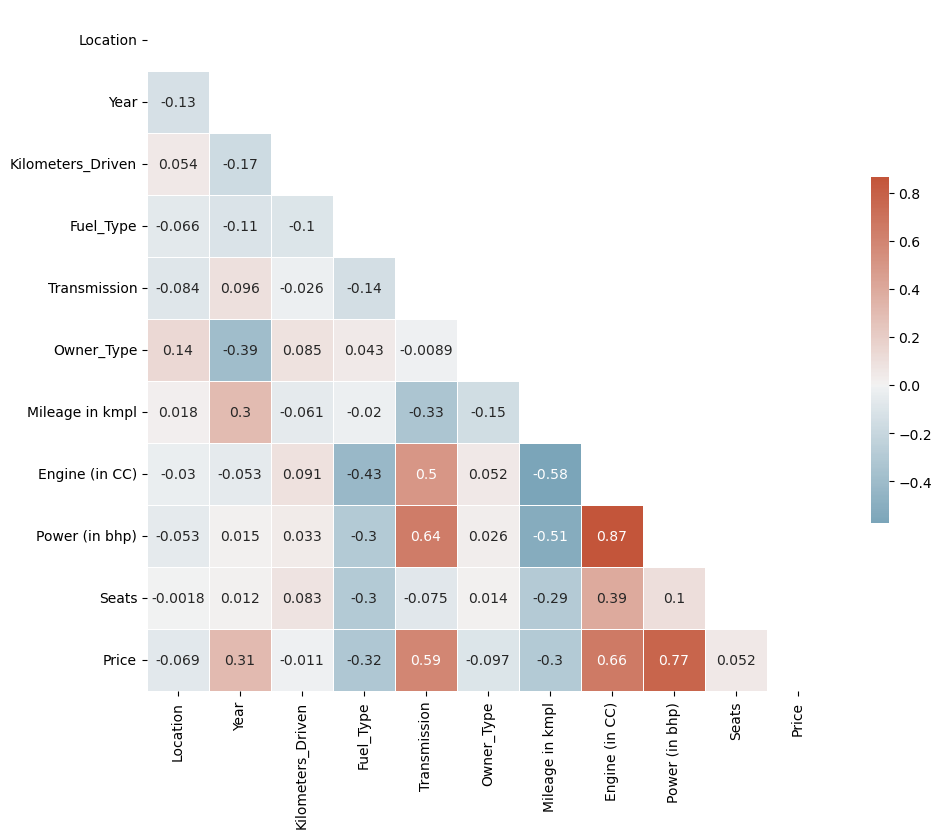

In [114]:
# Affichage d'une 4ème matrice de collération
corr = df_train.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,  center=0, square=True, linewidths=.5,cbar_kws={"shrink": .5},  annot=True)

Comme sur la troisième matrice de corrélation, on constate que le prix d'une voiture est fortement corrélé avec l'année de production, la transmission, le moteur, et la puissance moteur de celle-ci donc on peut dire que ces quatre features sont les plus importantes.
De plus le moteur et la puissance moteur sont fortement corrélé entre eux donc il serait sage de ne retenir qu'une seule de ces deux features pour l'entrainement du modèle et donc on va retenir Power car sa corrélation avec Price est plus grande que Engine.

In [115]:
pd.isnull(df_train).sum()

Name                   0
Location             549
Year                   0
Kilometers_Driven      0
Fuel_Type             10
Transmission           0
Owner_Type             0
Mileage in kmpl        0
Engine (in CC)         0
Power (in bhp)       103
Seats                  0
Price                  0
dtype: int64

In [116]:
df_train = df_train.dropna()

# **Entrainement des modèles**

In [117]:
# Chargement et nettoyage de test.csv
df_test = pd.read_csv("./Data/test.csv")

df_test = df_test.drop(columns=['New_Price'])
df_test = df_test.dropna()

location_code = {
    'Mumbai': 1,
    'Hyderabad': 2,
    'Kochi': 3,
    'Coimbatore': 4,
    'Pune': 5,
    'Dehli': 6,
    'Kolkata': 7,
    'Chennai': 8,
    'Jaipur': 9,
    'Bangalore': 10,
    'Ahmedabad': 11,
}

fuel_code = {
    'Diesel': 1,
    'Petrol': 2,
    'CNG': 3,
    'PLG': 4,
}

transmission_code = {
    'Manual': 1,
    'Automatic': 2,
}

owner_code = {
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth & Above': 4,
}

df_test['Location'] = df_test['Location'].map(location_code)
df_test['Fuel_Type'] = df_test['Fuel_Type'].map(fuel_code)
df_test['Transmission'] = df_test['Transmission'].map(transmission_code)
df_test['Owner_Type'] = df_test['Owner_Type'].map(owner_code)

# Suppression des unités de mesures dans les colonnes Engine & Power
df_test['Engine'] = df_test['Engine'].str.replace(' CC', '')
df_test['Power'] = df_test['Power'].str.replace(' bhp', '')

# Conversion en float des données des colonnes Engine & Power
df_test['Engine'] = pd.to_numeric(df_test['Engine'], errors='coerce')
df_test['Power'] = pd.to_numeric(df_test['Power'], errors='coerce')

# Changement du nom des colonnes Engine & Power pour inclure les unités de mesures correspondantes
df_test = df_test.rename(columns={'Engine': 'Engine (in CC)', 'Power': 'Power (in bhp)'})

# Conversion des mileage en km/kg en mileage en kmpl
Correct_Mileage= []
for i in df_test.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))
        
df_test['Mileage']=Correct_Mileage
df_test = df_test.rename(columns={'Mileage':'Mileage in kmpl'})
df_test = df_test.dropna()

# Affichage du dataframe df_test
df_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage in kmpl,Engine (in CC),Power (in bhp),Seats
1,Maruti Alto 800 2016-2019 LXI,4.0,2013,54493,2.0,1,2,24.0,796,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,1.0,2017,34000,1.0,1,1,13.6,2393,147.80,7.0
4,Hyundai i20 Magna,1.0,2014,29000,2.0,1,1,18.0,1197,82.85,5.0
5,Mahindra XUV500 W8 2WD,4.0,2016,85609,1.0,1,2,16.0,2179,140.00,7.0
6,Toyota Fortuner 4x2 AT TRD Sportivo,5.0,2015,59000,1.0,2,1,12.5,2982,168.70,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,2.0,2011,89411,1.0,1,1,20.5,1598,103.60,5.0
1230,Volkswagen Polo GT TSI,1.0,2015,59000,2.0,2,1,17.2,1197,103.60,5.0
1231,Nissan Micra Diesel XV,7.0,2012,28000,1.0,1,1,23.0,1461,63.10,5.0
1232,Volkswagen Polo GT TSI,5.0,2013,52262,2.0,2,3,17.0,1197,103.60,5.0


In [118]:
# Importation des bibliothèques scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [119]:
# La target est la colonne "Price". Ici, on garde toutes les features
X_full = df_train.drop(columns=['Name','Price'], axis= 0)

# La target est la colonne "Price". Ici, on ne garde que les features qui ont une importante corrélation avec "Price"
X_restraint = df_train.drop(columns=[
    'Name', 
    'Location',
    'Kilometers_Driven',
    'Fuel_Type',
    'Owner_Type',
    'Mileage in kmpl',
    'Engine (in CC)',
    'Seats',
    'Price'
], axis = 0)

In [120]:
pd.isnull(X_full).sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage in kmpl      0
Engine (in CC)       0
Power (in bhp)       0
Seats                0
dtype: int64

In [121]:
# suppression de tout NaN restant
X_full.dropna()
X_restraint.dropna()

# Définition de la target
y = df_train['Price']

# Séparation des données
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y, test_size= 0.2, random_state= 42)
X_restraint_train, X_restraint_test, y_restraint_train, y_restraint_test = train_test_split(X_restraint, y, test_size= 0.2, random_state= 42)

In [122]:
# function the return metrics of linear regression
def linearRegression(X_train, X_test, y_train, y_test):

    # Training the Multiple Linear Regression model on the Training set
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    # Predicting the Test set results
    y_pred = regressor.predict(X_test)
    coef = regressor.coef_
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2)*(X_test.shape[0] - 1) / \
        (X_test.shape[0] - X_test.shape[1]-1)
    print('Coefficients : ', coef)
    print('MAE : ', mae)
    print('MSE : ', mse)
    print('RMSE : ', rmse)
    print('R² : ', r2)
    print('Adjusted R² : ', adj_r2)
    return [mae, mse, rmse, r2, adj_r2]

In [123]:
# Evaluation des modèles de regression linéaire :
# avec toutes les features utilisés
print("Evaluation du modèle de regression linéaire qui utilise toutes les features:")
full_regression = linearRegression(X_full_train, X_full_test, y_full_train, y_full_test)
print()

# avec seulement les features : Year, Transmission, Power (in bhp)
print("Evaluation du modèle de regression linéaire qui utilise les features : Year, Transmission, Power (in bhp)") 
restraint_regression = linearRegression(X_restraint_train, X_restraint_test, y_restraint_train, y_restraint_test)

Evaluation du modèle de regression linéaire qui utilise toutes les features:
Coefficients :  [ 1.08236288e-02  1.00430322e+00  2.13054192e-06 -1.96674026e+00
  2.89626848e+00 -2.43843589e-01 -8.82619156e-02  9.88194101e-04
  1.27440258e-01 -7.79675756e-01]
MAE :  3.7999818837481336
MSE :  36.14137478987217
RMSE :  6.011769688691689
R² :  0.6880571685314922
Adjusted R² :  0.6850947484795595

Evaluation du modèle de regression linéaire qui utilise les features : Year, Transmission, Power (in bhp)
Coefficients :  [0.98091854 2.88926917 0.14547562]
MAE :  3.865423364394576
MSE :  37.10139833061012
RMSE :  6.091091719109976
R² :  0.6797710293540158
Adjusted R² :  0.6788647209465272


In [124]:
# SVR
regressor_full = make_pipeline(StandardScaler(), SVR(kernel="rbf", C=1.0, epsilon=0.2))

regressor_full.fit(X_full_train, y_full_train)
y_pred_full = regressor_full.predict(X_full_test)

print("SVR avec toutes les features :")
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_full_test, y_pred_full)
print('MAE:', mae)
# Calculate root mean squared error (RMSE)
mse = mean_squared_error(y_full_test, y_pred_full)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
# Calculate mean squared error (MSE)
print('MSE:', mse)
# R²
r2 = r2_score(y_full_test, y_pred_full)
print("R²:", r2)
# Calculate adjusted R²
n = len(X_full_test)
p = X_full_test.shape[1]  # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print('Adjusted R²:', adj_r2)

print()
print("================================================")
print()

print("SVR avec les features Year, Transmission, Power (in bhp) :")
regressor_restraint = make_pipeline(StandardScaler(), SVR(kernel="rbf", C=1.0, epsilon=0.2))
regressor_restraint.fit(X_restraint_train, y_restraint_train)
y_pred_restraint = regressor_restraint.predict(X_restraint_test)
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_restraint_test, y_pred_restraint)
print('MAE:', mae)
# Calculate root mean squared error (RMSE)
mse = mean_squared_error(y_restraint_test, y_pred_restraint)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
# Calculate mean squared error (MSE)
print('MSE:', mse)
# R²
r2 = r2_score(y_restraint_test, y_pred_restraint)
print("R²:", r2)
# Calculate adjusted R²
n = len(X_full_test)
p = X_full_test.shape[1]  # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print('Adjusted R²:', adj_r2)

SVR avec toutes les features :
MAE: 2.2758044390650904
RMSE: 5.771173263973603
MSE: 33.30644084280373
R²: 0.712526003146011
Adjusted R²: 0.7097959556925069


SVR avec les features Year, Transmission, Power (in bhp) :
MAE: 2.3660668745545244
RMSE: 5.111181016966489
MSE: 26.124171388198594
R²: 0.7745174875061229
Adjusted R²: 0.7723761531044717


In [125]:
# RidgeCV regression
from sklearn.linear_model import RidgeCV

# Avec toutes les features
print("RidgeCV avec toutes les features :")
# Chargement du modèle et ajustement de celui-ci à nos données
ridge_full = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_full_train, y_full_train)
# Prédiction
y_pred_full = ridge_full.predict(X_full_test)
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_full_test, y_pred_full)
print('MAE:', mae)
# Calculate root mean squared error (RMSE)
mse = mean_squared_error(y_full_test, y_pred_full)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
# Calculate mean squared error (MSE)
print('MSE:', mse)
# R²
r2 = r2_score(y_full_test, y_pred_full)
print("R²:", r2)
# Calculate adjusted R²
n = len(X_full_test)
p = X_full_test.shape[1]  # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print('Adjusted R²:', adj_r2)

print()
print("================================================")
print()

# Avec les features Year, Transmission, et Power (in bhp)
print("RidgeCV avec les features Year, Transmission, et Power :")
# Chargement du modèle et ajustement de celui-ci à nos données
ridge_restraint = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_restraint_train, y_restraint_train)
# Prédiction
y_pred_restraint = ridge_restraint.predict(X_restraint_test)
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_restraint_test, y_pred_restraint)
print('MAE:', mae)
# Calculate root mean squared error (RMSE)
mse = mean_squared_error(y_restraint_test, y_pred_restraint)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
# Calculate mean squared error (MSE)
print('MSE:', mse)
# R²
r2 = r2_score(y_restraint_test, y_pred_restraint)
print("R²:", r2)
# Calculate adjusted R²
n = len(X_full_test)
p = X_full_test.shape[1]  # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print('Adjusted R²:', adj_r2)


RidgeCV avec toutes les features :
MAE: 3.801495687934724
RMSE: 6.010032557366857
MSE: 36.12049134060961
R²: 0.6882374174105585
Adjusted R²: 0.6852767091238592


RidgeCV avec les features Year, Transmission, et Power :
MAE: 3.8654231147603904
RMSE: 6.091112231302453
MSE: 37.101648214322346
R²: 0.6797688725618853
Adjusted R²: 0.6767277412471834


In [126]:
from sklearn.tree import DecisionTreeRegressor

# DecisionTreeRegressor avec toutes les features
print("DecisionTreeRegressor avec toutes les features :")
# Chargement du modèle et ajustement de celui-ci à nos données
tree_full = DecisionTreeRegressor(random_state=42)
tree_full.fit(X_full_train, y_full_train)
# Prédiction
y_pred_full = tree_full.predict(X_full_test)
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_full_test, y_pred_full)
print('MAE:', mae)
# Calculate root mean squared error (RMSE)
mse = mean_squared_error(y_full_test, y_pred_full)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
# Calculate mean squared error (MSE)
print('MSE:', mse)
# R²
r2 = r2_score(y_full_test, y_pred_full)
print("R²:", r2)
# Calculate adjusted R²
n = len(X_full_test)
p = X_full_test.shape[1]  # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print('Adjusted R²:', adj_r2)

print()
print("================================================")
print()

# Avec les features Year, Transmission, et Power (in bhp)
print("RidgeCV avec les features Year, Transmission, et Power :")
# Chargement du modèle et ajustement de celui-ci à nos données
tree_restraint = DecisionTreeRegressor(random_state=42)
y_pred_restraint = tree_restraint.fit(X_restraint_train, y_restraint_train)
# Prédiction
y_pred_restraint = tree_restraint.predict(X_restraint_test)
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_restraint_test, y_pred_restraint)
print('MAE:', mae)
# Calculate root mean squared error (RMSE)
mse = mean_squared_error(y_restraint_test, y_pred_restraint)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
# Calculate mean squared error (MSE)
print('MSE:', mse)
# R²
r2 = r2_score(y_restraint_test, y_pred_restraint)
print("R²:", r2)
# Calculate adjusted R²
n = len(X_full_test)
p = X_full_test.shape[1]  # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print('Adjusted R²:', adj_r2)

DecisionTreeRegressor avec toutes les features :
MAE: 2.0765836466165415
RMSE: 5.005961725388302
MSE: 25.05965279605263
R²: 0.7837055426289716
Adjusted R²: 0.781651464211393


RidgeCV avec les features Year, Transmission, et Power :
MAE: 1.8779687968822625
RMSE: 4.599585682378992
MSE: 21.156188449545812
R²: 0.817397059010549
Adjusted R²: 0.8156629380134982


In [127]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor avec toutes les features
print("RandomForestRegressor avec toutes les features :")
# Chargement du modèle et ajustement de celui-ci à nos données
random_forest_full = RandomForestRegressor(max_depth=2, random_state=42)
random_forest_full.fit(X_full_train, y_full_train)
# Prédiction
y_pred_full = random_forest_full.predict(X_full_test)
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_full_test, y_pred_full)
print('MAE:', mae)
# Calculate root mean squared error (RMSE)
mse = mean_squared_error(y_full_test, y_pred_full)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
# Calculate mean squared error (MSE)
print('MSE:', mse)
# R²
r2 = r2_score(y_full_test, y_pred_full)
print("R²:", r2)
# Calculate adjusted R²
n = len(X_full_test)
p = X_full_test.shape[1]  # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print('Adjusted R²:', adj_r2)

print()
print("================================================")
print()

# Avec les features Year, Transmission, et Power (in bhp)
print("RandomForestRegressor avec les features Year, Transmission, et Power :")
# Chargement du modèle et ajustement de celui-ci à nos données
random_forest_restraint = RandomForestRegressor(max_depth=2, random_state=42)
y_pred_restraint = random_forest_restraint.fit(X_restraint_train, y_restraint_train)
# Prédiction
y_pred_restraint = random_forest_restraint.predict(X_restraint_test)
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_restraint_test, y_pred_restraint)
print('MAE:', mae)
# Calculate root mean squared error (RMSE)
mse = mean_squared_error(y_restraint_test, y_pred_restraint)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
# Calculate mean squared error (MSE)
print('MSE:', mse)
# R²
r2 = r2_score(y_restraint_test, y_pred_restraint)
print("R²:", r2)
# Calculate adjusted R²
n = len(X_full_test)
p = X_full_test.shape[1]  # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print('Adjusted R²:', adj_r2)

RandomForestRegressor avec toutes les features :
MAE: 3.6003988144531456
RMSE: 6.258483153650722
MSE: 39.168611384529896
R²: 0.6619285345115368
Adjusted R²: 0.6587179792837261


RandomForestRegressor avec les features Year, Transmission, et Power :
MAE: 3.66041109297013
RMSE: 6.306827003709078
MSE: 39.77606685471402
R²: 0.6566854749859381
Adjusted R²: 0.6534251281197077


In [128]:
from sklearn.linear_model import LassoCV

# LassoCV avec toutes les features
print("LassoCV avec toutes les features :")
# Chargement du modèle et ajustement de celui-ci à nos données
LassoCV_full = LassoCV(cv=5, random_state=42)
LassoCV_full.fit(X_full_train, y_full_train)
# Prédiction
y_pred_full = LassoCV_full.predict(X_full_test)
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_full_test, y_pred_full)
print('MAE:', mae)
# Calculate root mean squared error (RMSE)
mse = mean_squared_error(y_full_test, y_pred_full)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
# Calculate mean squared error (MSE)
print('MSE:', mse)
# R²
r2 = r2_score(y_full_test, y_pred_full)
print("R²:", r2)
# Calculate adjusted R²
n = len(X_full_test)
p = X_full_test.shape[1]  # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print('Adjusted R²:', adj_r2)

print()
print("================================================")
print()

# Avec les features Year, Transmission, et Power (in bhp)
print("LassoCV avec les features Year, Transmission, et Power :")
# Chargement du modèle et ajustement de celui-ci à nos données
LassoCV_restraint = LassoCV(cv=5, random_state=42)
y_pred_restraint = LassoCV_restraint.fit(X_restraint_train, y_restraint_train)
# Prédiction
y_pred_restraint = LassoCV_restraint.predict(X_restraint_test)
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_restraint_test, y_pred_restraint)
print('MAE:', mae)
# Calculate root mean squared error (RMSE)
mse = mean_squared_error(y_restraint_test, y_pred_restraint)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
# Calculate mean squared error (MSE)
print('MSE:', mse)
# R²
r2 = r2_score(y_restraint_test, y_pred_restraint)
print("R²:", r2)
# Calculate adjusted R²
n = len(X_full_test)
p = X_full_test.shape[1]  # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print('Adjusted R²:', adj_r2)

LassoCV avec toutes les features :
MAE: 4.106758801052724
RMSE: 6.929471597828828
MSE: 48.017576625116405
R²: 0.5855514932737891
Adjusted R²: 0.5816156100190293


LassoCV avec les features Year, Transmission, et Power :
MAE: 3.9128260259464724
RMSE: 6.187151419573954
MSE: 38.280842688736
R²: 0.6695910288761024
Adjusted R²: 0.6664532418758755
